# Final Project
# Henry Pham
# Department of Data Science, Bellevue University
# DSC630-T302
# Professor: Andrew Hua
# Assignment Due Date: 2023-11-18

In [1]:
#----Final Project----

# Introduction

In [2]:
# This project seeks to develop predictive models to forecast the performance of NVIDIA chips based on a competitive set of financial indicators and technology indicators. 
# By leveraging historical data on interest rates, stock market indices, Intel chip stock prices, and AMD chip stock prices, 
# I aim to gain valuable insights into the potential impact of these factors on NVIDIA’s chip performance.

# Data Sources

In [3]:
# Daily historical interest rates data from Treasury Department, from 2019 to 2023:
# https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023

# Daily historical S&P 500 stock market indices, NVIDIA, Intel, and AMD from Yahoo Finance, from 2019 to 2023:
# SPDR S&P 500 ETF Trust (SPY) Stock Historical Prices & Data - Yahoo Finance
# NVIDIA Corporation (NVDA) Stock Historical Prices & Data - Yahoo Finance
# Intel Corporation (INTC) Stock Historical Prices & Data - Yahoo Finance
# Advanced Micro Devices, Inc. (AMD) Stock Historical Prices & Data - Yahoo Finance

# Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

# Get interest rates data

In [5]:
# I have to pull each year data from 2019 to 2023 because maximum data I can pull is one year.

## Year 2023

In [6]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2023.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2023_df.
rate_2023_df = pd.read_html(url)[0]

# Show few rows
rate_2023_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,01/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,01/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,01/06/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,01/09/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [7]:
# Export and save rate_2023
rate_2023_df.to_csv("C:\\DSC630\\rate_2023.csv")

## Year 2022

In [8]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2022.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2022_df.
rate_2022_df = pd.read_html(url)[0]

# Show few rows
rate_2022_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [9]:
# Export and save rate_2022
rate_2022_df.to_csv("C:\\DSC630\\rate_2022.csv")

## Year 2021

In [10]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2021.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2021'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2021_df.
rate_2021_df = pd.read_html(url)[0]

# Show few rows
rate_2021_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66
1,01/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70
2,01/06/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81
3,01/07/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85
4,01/08/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87


In [11]:
# Export and save rate_2021
rate_2021_df.to_csv("C:\\DSC630\\rate_2021.csv")

## Year 2020

In [12]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2020
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2020'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2020_df.
rate_2020_df = pd.read_html(url)[0]

# Show few rows
rate_2020_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,01/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,01/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,01/07/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,01/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35


In [13]:
# Export and save rate_2020
rate_2020_df.to_csv("C:\\DSC630\\rate_2020.csv")

## Year 2019

In [14]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2019
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2019'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2019_df.
rate_2019_df = pd.read_html(url)[0]

# Show few rows
rate_2019_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1,01/03/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2,01/04/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
3,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
4,01/08/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00


In [15]:
# Export and save rate_2019
rate_2019_df.to_csv("C:\\DSC630\\rate_2019.csv")

# Consolidate all rates (2019-2023) into one dataframe

In [16]:
# Import the pandas library
import pandas as pd

# Use the read_csv() function from the pandas library to read the CSV file located 
# at the specified file path (C:\\DSC630\\rate_2023.csv). 
# The read_csv() function reads the CSV file and converts it into a pandas DataFrame.
# The DataFrame is assigned to the variable rate_2023.
rate_2023 = pd.read_csv('C:\\DSC630\\rate_2023.csv')

# Repeat the same for the remaining years.
rate_2022 = pd.read_csv('C:\\DSC630\\rate_2022.csv')
rate_2021 = pd.read_csv('C:\\DSC630\\rate_2021.csv')
rate_2020 = pd.read_csv('C:\\DSC630\\rate_2020.csv')
rate_2019 = pd.read_csv('C:\\DSC630\\rate_2019.csv')

In [17]:
#  Create a new DataFrame called smaller_df by removing the specified columns from the original DataFrame data.

# The drop() function is used to remove specified columns from the DataFrame.
# ['20 YR', '30 YR'] is a list of column names that are removed from the DataFrame.
# axis=1 specifies that the columns should be dropped, as opposed to rows. 
smaller_rate_2023 = rate_2023.drop(['20 YR','30 YR'], axis=1)

# Repeat the same for the remaining years.
smaller_rate_2022 = rate_2022.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2021 = rate_2021.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2020 = rate_2020.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2019 = rate_2019.drop(['20 YR','30 YR'], axis=1)

In [18]:
# Import sqldf function from the pandasql library. 
# The pandasql library provides a way to execute SQL queries on pandas DataFrames.
from pandasql import sqldf

# The query combines data from smaller_rate_2023, smaller_rate_2022, smaller_rate_2021, smaller_rate_2020, and smaller_rate_2019
# using the UNION ALL operator.
# This results in a single DataFrame that contains the selected columns from all the specified DataFrames.
query = """
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2023
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2022
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2021
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2020
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2019
"""

In [19]:
# Run the query
rate_df = sqldf(query)

In [20]:
# Show few rows
rate_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2023,4.17,4.42,4.53,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,01/04/2023,4.20,4.42,4.55,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,01/05/2023,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,01/06/2023,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,01/09/2023,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [21]:
# Get the dimensions of a pandas DataFrame
rate_df.shape

(1223, 14)

In [22]:
# In the rate dataset, rename col '1 Yr' to 'daily_rate'
rate_df = rate_df.rename(columns={'1 Yr': 'daily_rate'})
# Display few rows in the new rate dataset.
rate_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,daily_rate,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2023,4.17,4.42,4.53,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,01/04/2023,4.20,4.42,4.55,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,01/05/2023,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,01/06/2023,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,01/09/2023,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [23]:
# Export and save consolidated rate
rate_df.to_csv("C:\\DSC630\\rate.csv")

# Get Intel stock prices data

In [24]:
# Import the pandas library
import pandas as pd
# Import the yfinance library
import yfinance as yf
# Import the YahooFinancials class from the yahoofinancials library. 
from yahoofinancials import YahooFinancials
# # Use the download function from the yfinance library to fetch historical Intel stock prices,
# symbol 'INTC' from January 1, 2019, to November 06, 2023. The fetched data is stored in a pandas DataFrame named 'intc_df'.
intc_df = yf.download('INTC', 
                      start='2019-01-01', 
                      end='2023-11-06', 
                      progress=False,
)
# Show few rows
intc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,45.959999,47.470001,45.770000,47.080002,41.060699,18774600
2019-01-03,46.150002,46.279999,44.389999,44.490002,38.801834,32267300
2019-01-04,45.840000,47.570000,45.540001,47.220001,41.182800,35447300
2019-01-07,47.099998,48.000000,46.750000,47.439999,41.374668,22736800
2019-01-08,47.799999,48.029999,46.779999,47.740002,41.636318,22749200


In [25]:
# Export and save Intel stock
intc_df.to_csv("C:\\DSC630\\intel_stock.csv")

# Get AMD stock prices data

In [26]:
# Import the pandas library
import pandas as pd
# Import the yfinance library
import yfinance as yf
# Import the YahooFinancials class from the yahoofinancials library. 
from yahoofinancials import YahooFinancials
# # Use the download function from the yfinance library to fetch historical AMD stock prices,
# symbol 'AMD' from January 1, 2019, to November 06, 2023. The fetched data is stored in a pandas DataFrame named 'amd_df'.
amd_df = yf.download('AMD', 
                      start='2019-01-01', 
                      end='2023-11-06', 
                      progress=False,
)
# Show few rows
amd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,18.010000,19.000000,17.980000,18.830000,18.830000,87148700
2019-01-03,18.420000,18.680000,16.940001,17.049999,17.049999,117277600
2019-01-04,17.549999,19.070000,17.430000,19.000000,19.000000,111878600
2019-01-07,19.440001,20.680000,19.000000,20.570000,20.570000,107157000
2019-01-08,21.190001,21.200001,19.680000,20.750000,20.750000,121271000


In [27]:
# Export and save AMD stock
amd_df.to_csv("C:\\DSC630\\amd_stock.csv")

# Get NVIDIA stock prices data

In [28]:
# Import the pandas library
import pandas as pd
# Import the yfinance library
import yfinance as yf
# Import the YahooFinancials class from the yahoofinancials library. 
from yahoofinancials import YahooFinancials
# # Use the download function from the yfinance library to fetch historical NVIDIA stock prices,
# symbol 'NVDA' from January 1, 2019, to November 06, 2023. The fetched data is stored in a pandas DataFrame named 'nvda_df'.
nvda_df = yf.download('NVDA', 
                      start='2019-01-01', 
                      end='2023-11-06', 
                      progress=False,
)
# Show few rows
nvda_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.793442,50875200
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.751753,70555200
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.786011,58562000
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.574654,70916000
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.689014,78601600


In [29]:
# Export and save NVIDIA stock
nvda_df.to_csv("C:\\DSC630\\nvda_stock.csv")

# Get stock market indices data

In [30]:
# Import the pandas library
import pandas as pd
# Import the yfinance library
import yfinance as yf
# Import the YahooFinancials class from the yahoofinancials library. 
from yahoofinancials import YahooFinancials
# # Use the download function from the yfinance library to fetch historical SPY stock prices,
# symbol 'SPY' from January 1, 2019, to November 06, 2023. The fetched data is stored in a pandas DataFrame named 'spy_df'.
spy_df = yf.download('SPY', 
                      start='2019-01-01', 
                      end='2023-11-06', 
                      progress=False,
)
# Show few rows
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,231.492218,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,225.968155,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,233.537186,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,235.378525,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,237.589981,102512600


In [31]:
# Export and save SPY stock market indices
spy_df.to_csv("C:\\DSC630\\spy_stock.csv")

# Get the final dataset for rate, SPY, NVDA, INTC, and AMD

In [32]:
# Import the pandas library
import pandas as pd
# Read the csv files for rate, apple and spy.
rate = pd.read_csv("C:\\DSC630\\rate.csv")
spy = pd.read_csv("C:\\DSC630\\spy_stock.csv")
nvda = pd.read_csv("C:\\DSC630\\nvda_stock.csv")
intc = pd.read_csv("C:\\DSC630\\intel_stock.csv")
amd = pd.read_csv("C:\\DSC630\\amd_stock.csv")

In [33]:
# Cast Date col to datetime datatype in the rate dataset.
rate['Date'] = pd.to_datetime(rate['Date'], format='%m/%d/%Y')
# Show few rows
rate.head()

,Unnamed: 0,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,daily_rate,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,0,2023-01-03,4.17,4.42,4.53,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,1,2023-01-04,4.20,4.42,4.55,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,2,2023-01-05,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,3,2023-01-06,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,4,2023-01-09,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [34]:
# Cast Date col to datetime datatype in the SPY dataset.
spy['Date'] = pd.to_datetime(spy['Date'], format='%Y-%m-%d')
# Show few rows
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,245.979996,251.210007,245.949997,250.179993,231.492218,126925200
1,2019-01-03,248.229996,248.570007,243.669998,244.210007,225.968155,144140700
2,2019-01-04,247.589996,253.110001,247.169998,252.389999,233.537186,142628800
3,2019-01-07,252.690002,255.949997,251.690002,254.380005,235.378525,103139100
4,2019-01-08,256.820007,257.309998,254.000000,256.769989,237.589981,102512600


In [35]:
# Cast Date col to datetime datatype in the NVDA dataset.
nvda['Date'] = pd.to_datetime(nvda['Date'], format='%Y-%m-%d')
# Show few rows
nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,32.660000,34.619999,32.512501,34.055000,33.793442,50875200
1,2019-01-03,33.447498,33.790001,31.922501,31.997499,31.751753,70555200
2,2019-01-04,32.735001,34.432499,32.424999,34.047501,33.786011,58562000
3,2019-01-07,34.625000,36.222500,34.107498,35.849998,35.574654,70916000
4,2019-01-08,36.672501,36.695000,34.224998,34.957500,34.689014,78601600


In [36]:
# Cast Date col to datetime datatype in the INTC dataset.
intc['Date'] = pd.to_datetime(intc['Date'], format='%Y-%m-%d')
# Show few rows
intc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,41.060699,18774600
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,38.801834,32267300
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.182800,35447300
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.374668,22736800
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,41.636318,22749200


In [37]:
# Cast Date col to datetime datatype in the AMD dataset.
amd['Date'] = pd.to_datetime(amd['Date'], format='%Y-%m-%d')
# Show few rows
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,18.010000,19.000000,17.980000,18.830000,18.830000,87148700
1,2019-01-03,18.420000,18.680000,16.940001,17.049999,17.049999,117277600
2,2019-01-04,17.549999,19.070000,17.430000,19.000000,19.000000,111878600
3,2019-01-07,19.440001,20.680000,19.000000,20.570000,20.570000,107157000
4,2019-01-08,21.190001,21.200001,19.680000,20.750000,20.750000,121271000


In [38]:
# import sqldf
from pandasql import sqldf
# Join rate variable with spy, nvda, intc, and amd variables to get relevent cols and
# create some new cols in the final dataset.

query = """
WITH CTE AS
(
Select
A.Date, A.daily_rate, A.[1 Mo], A.[2 Mo],A.[3 Mo],A.[4 Mo],A.[6 Mo],
A.[2 Yr], A.[3 Yr], A.[5 Yr], A.[7 Yr], A.[10 Yr], A.[20 Yr], A.[30 Yr],
ROW_NUMBER() OVER(ORDER BY A.Date) AS Id -- Create an Id col to sort the Date
From rate AS A
)
, CTE2 AS
(
Select
A.Date, A.Id, A.daily_rate, A.[1 Mo], A.[2 Mo],A.[3 Mo],A.[4 Mo],A.[6 Mo],
A.[2 Yr], A.[3 Yr], A.[5 Yr], A.[7 Yr], A.[10 Yr], A.[20 Yr], A.[30 Yr],

B.Close as spy_closePrice, --Replace headers
B.Open AS spy_OpenPrice, --Replace headers
B.High as spy_HighPrice,  --Replace headers
B.Low AS spy_lowPrice, --Replace headers
B.Volume AS spy_volumn, --Replace headers

C.[Close] as nvda_closePrice, --Replace headers
C.[Volume] AS nvda_volumn, --Replace headers
C.Open AS nvda_OpenPrice, --Replace headers
C.High as nvda_HighPrice, --Replace headers
C.Low as nvda_LowPrice, --Replace header

D.[Close] as intc_closePrice, --Replace headers
D.[Volume] AS intc_volumn, --Replace headers
D.Open AS intc_OpenPrice, --Replace headers
D.High as intc_HighPrice, --Replace headers
D.Low as intc_LowPrice, --Replace header

E.[Close] as amd_closePrice, --Replace headers
E.[Volume] AS amd_volumn, --Replace headers
E.Open AS amd_OpenPrice, --Replace headers
E.High as amd_HighPrice, --Replace headers
E.Low as amd_LowPrice --Replace header
From CTE AS A
Inner Join spy AS B --join rate with spy
ON A.Date = B.Date
Inner Join nvda AS C --join rate with nvda
On A.Date = C.Date
Inner Join intc AS D --join rate with intc
On A.Date = D.Date
Inner Join amd AS E --join rate with amd
On A.Date = E.Date
)
, CTE3 AS
(
Select
--new col Lead_nvda
LEAD(nvda_closePrice, 1) OVER(Order by Id) as Lead_nvda,
Date, Id, daily_rate, [1 Mo], [2 Mo], [3 Mo], [4 Mo], [6 Mo],
[2 Yr], [3 Yr], [5 Yr], [7 Yr], [10 Yr], [20 Yr], [30 Yr],

spy_closePrice, 
spy_OpenPrice, 
spy_HighPrice, 
spy_lowPrice, 
spy_volumn, 

nvda_closePrice, 
nvda_volumn, 
nvda_OpenPrice, 
nvda_HighPrice,  
nvda_LowPrice,

intc_closePrice, 
intc_volumn, 
intc_OpenPrice, 
intc_HighPrice,  
intc_LowPrice,

amd_closePrice, 
amd_volumn, 
amd_OpenPrice, 
amd_HighPrice,  
amd_LowPrice
From CTE2
)
, CTE4 AS
(
Select
Lead_nvda, nvda_closePrice, 

(nvda_closePrice - Lead_nvda) AS nvda_point_change,  --new col nvda_point_change
CASE 
WHEN (nvda_closePrice-Lead_nvda) < 0 THEN 'Down-day'
WHEN (nvda_closePrice-Lead_nvda) > 0 THEN 'Up-day'
END AS nvda_Indication,  --new col nvda_Indication,

Date, Id, daily_rate, [1 Mo], [2 Mo], [3 Mo], [6 Mo], [2 Yr], [3 Yr], [5 Yr], [7 Yr], [10 Yr], [20 Yr], [30 Yr],

nvda_OpenPrice, nvda_HighPrice, nvda_lowPrice, nvda_volumn,

spy_closePrice, spy_volumn, spy_OpenPrice, spy_HighPrice, spy_LowPrice,

intc_closePrice, intc_volumn, intc_OpenPrice, intc_HighPrice, intc_LowPrice,

amd_closePrice, amd_volumn, amd_OpenPrice, amd_HighPrice, amd_LowPrice
From CTE3
)
Select
nvda_closePrice, nvda_point_change, nvda_Indication, spy_closePrice, intc_closePrice, amd_closePrice, 
Date, Id, daily_rate, [1 Mo], [2 Mo], [3 Mo], [6 Mo], [2 Yr], [3 Yr], [5 Yr], [7 Yr], [10 Yr], [20 Yr], [30 Yr],
spy_OpenPrice, spy_HighPrice, spy_lowPrice, spy_volumn, 
nvda_volumn, nvda_OpenPrice, nvda_HighPrice, nvda_LowPrice,
intc_OpenPrice, intc_HighPrice, intc_lowPrice, intc_volumn,
amd_OpenPrice, amd_HighPrice, amd_lowPrice, amd_volumn
From CTE4
WHERE nvda_point_change is not null AND nvda_Indication is not null
"""

In [39]:
# Run the query
final_df = sqldf(query)

In [40]:
# Show few rows
final_df.head()

,nvda_closePrice,nvda_point_change,nvda_Indication,spy_closePrice,intc_closePrice,amd_closePrice,Date,Id,daily_rate,1 Mo,...,nvda_HighPrice,nvda_lowPrice,intc_OpenPrice,intc_HighPrice,intc_LowPrice,intc_volumn,amd_OpenPrice,amd_HighPrice,amd_LowPrice,amd_volumn
0,34.055000,2.057501,Up-day,250.179993,47.080002,18.830000,2019-01-02 00:00:00.000000,1,2.60,2.40,...,34.619999,32.512501,45.959999,47.470001,45.770000,18774600,18.010000,19.000000,17.980000,87148700
1,31.997499,-2.050001,Down-day,244.210007,44.490002,17.049999,2019-01-03 00:00:00.000000,2,2.50,2.42,...,33.790001,31.922501,46.150002,46.279999,44.389999,32267300,18.420000,18.680000,16.940001,117277600
2,34.047501,-1.802498,Down-day,252.389999,47.220001,19.000000,2019-01-04 00:00:00.000000,3,2.57,2.40,...,34.432499,32.424999,45.840000,47.570000,45.540001,35447300,17.549999,19.070000,17.430000,111878600
3,35.849998,0.892498,Up-day,254.380005,47.439999,20.570000,2019-01-07 00:00:00.000000,4,2.58,2.42,...,36.222500,34.107498,47.099998,48.000000,46.750000,22736800,19.440001,20.680000,19.000000,107157000
4,34.957500,-0.687500,Down-day,256.769989,47.740002,20.750000,2019-01-08 00:00:00.000000,5,2.60,2.40,...,36.695000,34.224998,47.799999,48.029999,46.779999,22749200,21.190001,21.200001,19.680000,121271000


In [41]:
# Export and save the final dataset
final_df.to_csv("C:\\DSC630\\Final_dataset.csv")

# Data Cleaning

In [42]:
# Check the dimension of the final dataset.
final_df.shape

(1209, 36)

In [43]:
# There are 1209 rows and 36 columns in the final dataset.

In [44]:
# Check the datatype of each column
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nvda_closePrice    1209 non-null   float64
 1   nvda_point_change  1209 non-null   float64
 2   nvda_Indication    1209 non-null   object 
 3   spy_closePrice     1209 non-null   float64
 4   intc_closePrice    1209 non-null   float64
 5   amd_closePrice     1209 non-null   float64
 6   Date               1209 non-null   object 
 7   Id                 1209 non-null   int64  
 8   daily_rate         1209 non-null   float64
 9   1 Mo               1209 non-null   float64
 10  2 Mo               1209 non-null   float64
 11  3 Mo               1209 non-null   float64
 12  6 Mo               1209 non-null   float64
 13  2 Yr               1209 non-null   float64
 14  3 Yr               1209 non-null   float64
 15  5 Yr               1209 non-null   float64
 16  7 Yr               1209 

In [45]:
# Check missing values
final_df.isnull().sum()

nvda_closePrice      0
nvda_point_change    0
nvda_Indication      0
spy_closePrice       0
intc_closePrice      0
amd_closePrice       0
Date                 0
Id                   0
daily_rate           0
1 Mo                 0
2 Mo                 0
3 Mo                 0
6 Mo                 0
2 Yr                 0
3 Yr                 0
5 Yr                 0
7 Yr                 0
10 Yr                0
20 Yr                0
30 Yr                0
spy_OpenPrice        0
spy_HighPrice        0
spy_LowPrice         0
spy_volumn           0
nvda_volumn          0
nvda_OpenPrice       0
nvda_HighPrice       0
nvda_lowPrice        0
intc_OpenPrice       0
intc_HighPrice       0
intc_LowPrice        0
intc_volumn          0
amd_OpenPrice        0
amd_HighPrice        0
amd_LowPrice         0
amd_volumn           0
dtype: int64

In [46]:
# There is no missing values in the final dataset.

In [47]:
# Check duplicates
final_df.duplicated().sum()

0

In [48]:
# There is no duplicates

In [49]:
# list col names in the final dataset.
for col in final_df:
    print(col)

nvda_closePrice
nvda_point_change
nvda_Indication
spy_closePrice
intc_closePrice
amd_closePrice
Date
Id
daily_rate
1 Mo
2 Mo
3 Mo
6 Mo
2 Yr
3 Yr
5 Yr
7 Yr
10 Yr
20 Yr
30 Yr
spy_OpenPrice
spy_HighPrice
spy_LowPrice
spy_volumn
nvda_volumn
nvda_OpenPrice
nvda_HighPrice
nvda_lowPrice
intc_OpenPrice
intc_HighPrice
intc_LowPrice
intc_volumn
amd_OpenPrice
amd_HighPrice
amd_LowPrice
amd_volumn


In [50]:
# Stats summary
final_df.describe()

,nvda_closePrice,nvda_point_change,spy_closePrice,intc_closePrice,amd_closePrice,Id,daily_rate,1 Mo,2 Mo,3 Mo,...,nvda_HighPrice,nvda_lowPrice,intc_OpenPrice,intc_HighPrice,intc_LowPrice,intc_volumn,amd_OpenPrice,amd_HighPrice,amd_LowPrice,amd_volumn
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,...,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000,1209.000000,1.209000e+03
mean,167.775070,-0.344082,372.160207,47.053432,76.503763,606.461538,1.979471,1.743027,1.813077,1.858478,...,170.886900,164.397566,47.040943,47.645426,46.454715,3.242398e+07,76.514351,78.067965,74.900116,6.682008e+07
std,113.964490,6.489138,62.368722,11.030910,32.203244,350.035117,1.890316,1.874759,1.909816,1.934408,...,116.088188,111.810060,11.033205,11.121984,10.936616,1.667742e+07,32.266006,32.939034,31.482774,2.986473e+07
min,31.997499,-74.419983,222.949997,24.900000,17.049999,1.000000,0.040000,0.000000,0.000000,0.000000,...,33.790001,31.922501,24.730000,25.120001,24.590000,6.313200e+06,17.549999,18.680000,16.940001,1.670590e+07
25%,66.737503,-2.600006,311.500000,36.709999,49.880001,304.000000,0.140000,0.080000,0.090000,0.090000,...,68.199997,64.500000,36.680000,37.189999,36.029999,2.140360e+07,49.650002,50.669998,48.639999,4.567350e+07
50%,142.632507,-0.304996,387.519989,49.410000,81.519997,607.000000,1.590000,1.530000,1.560000,1.560000,...,144.119995,139.539993,49.389999,50.060001,48.759998,2.896390e+07,81.510002,82.839996,79.970001,5.858070e+07
75%,222.419998,2.059998,425.480011,55.480000,99.050003,909.000000,3.290000,2.450000,2.530000,2.710000,...,226.949997,218.899994,55.279999,56.040001,54.759998,3.828990e+07,98.599998,101.400002,96.730003,8.167250e+07
max,493.549988,22.769989,477.709991,68.470001,161.910004,1212.000000,5.490000,6.020000,5.610000,5.630000,...,502.660004,489.579987,68.199997,69.290001,67.309998,1.822699e+08,163.279999,164.460007,156.100006,2.253941e+08


In [51]:
# Statistical summary of the final dataset to check whether mean and median are close to each other.

# daily_rate: positive skewed because mean > median.
# spy_closePrice: negative skewed because mean < median.
# nvda_closePrice: positive skewed because mean > median.
# intc_closePrice: negative skewed because mean < median.
# amd_closePrice: negative skewed because mean < median.

In [52]:
# Check for outliers.
# I use z-scores to check whether there are outliers.

In [53]:
# Subset the data for the variables of interest rate, stock market indices, NVIDA stock prices,
# Intel stock prices, and AMD stock prices.
interest_rate = final_df['daily_rate']
stock_market = final_df['spy_closePrice']
nvda_stock = final_df['nvda_closePrice']
intc_stock = final_df['intc_closePrice']
amd_stock = final_df['amd_closePrice']

In [54]:
# Z-scores method for interest rates:
# I can calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [55]:
# Calculate the mean, median, and standard deviation for interest rates
mean = interest_rate.mean()
median = interest_rate.median()
std = interest_rate.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (interest_rate - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "interest_rate" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = interest_rate[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: daily_rate, dtype: float64)


In [56]:
# There is no outliers for interest rates in the z-scores method.

In [57]:
# Repeat the same for stock market indices

In [58]:
# Calculate the mean, median, and standard deviation
mean = stock_market.mean()
median = stock_market.median()
std = stock_market.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (stock_market - mean) / std

# Identify the outliers based on the threshold
outliers = stock_market[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: spy_closePrice, dtype: float64)


In [59]:
# There is no outliers for stock market index in the z-scores method.

In [60]:
# Repeat the same for NVIDIA stock prices

In [61]:
# Calculate the mean, median, and standard deviation
mean = nvda_stock.mean()
median = nvda_stock.median()
std = nvda_stock.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (nvda_stock - mean) / std

# Identify the outliers based on the threshold
outliers = nvda_stock[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: nvda_closePrice, dtype: float64)


In [62]:
# There is no outliers for NVIDIA stock prices in the z-scores method.

In [63]:
# Repeat the same for Intel stock prices

In [64]:
# Calculate the mean, median, and standard deviation
mean = intc_stock.mean()
median = intc_stock.median()
std = intc_stock.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (intc_stock - mean) / std

# Identify the outliers based on the threshold
outliers = intc_stock[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: intc_closePrice, dtype: float64)


In [65]:
# There is no outliers for Intel stock prices in the z-scores method.

In [66]:
# Repeat the same for AMD stock prices

In [67]:
# Calculate the mean, median, and standard deviation
mean = amd_stock.mean()
median = amd_stock.median()
std = amd_stock.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (amd_stock - mean) / std

# Identify the outliers based on the threshold
outliers = amd_stock[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: amd_closePrice, dtype: float64)


In [68]:
# There is no outliers for AMD stock prices in the z-scores method.

# Graphical analysis

In [69]:
# Import few libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

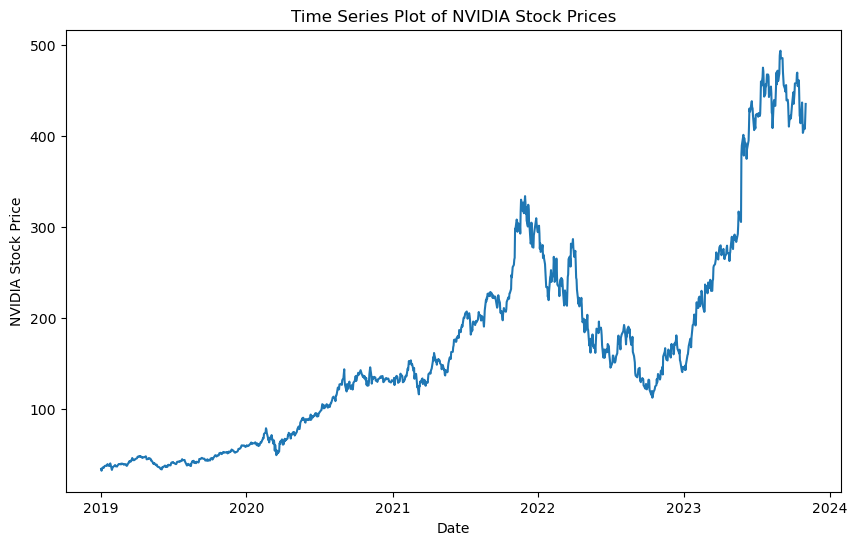

In [70]:
# Time Series Plot of NVDIA Stock Prices

# Convert the 'Date' column in the DataFrame 'final_df' to datetime format using the pd.to_datetime() function
final_df['Date'] = pd.to_datetime(final_df['Date'], unit='ns')
# Create a new figure with a specified size using the plt.figure() function from the matplotlib.pyplot library. 
# The figsize parameter determines the width and height of the figure in inches.
plt.figure(figsize=(10, 6))
# Plot a line graph using the 'Date' column as the x-axis and the 'nvda_closePrice' column as the y-axis. 
# It visualizes the time series of NVIDIA stock prices over the specified period, 2019-2023.
plt.plot(final_df['Date'], final_df['nvda_closePrice'])
# Set the x-axis label of the plot as 'Date'
plt.xlabel('Date')
# Set the y-axis label of the plot as 'NVIDIA Stock Price'
plt.ylabel('NVIDIA Stock Price')
# Set the title of the plot as 'Time Series Plot of Apple Stock Prices'
plt.title('Time Series Plot of NVIDIA Stock Prices')
# Display the plot.
plt.show()

In [71]:
# I can visualize the historical trends and fluctuations in NVIDIA stock prices over time. 
# The slope of this plot is positive, indicating an upward trend.
# The plot helps to identify patterns, and overall movements in the stock price, 
# providing insights into the historical performance of NVIDIA stock.

In [72]:
# Validate the slope of the NVIDIA plot.

In [73]:
# Import the NumPy library 
import numpy as np
# Import the LinearRegression class from the scikit-learn library.
from sklearn.linear_model import LinearRegression

# convert the 'Date' column in the DataFrame 'final_df' to numeric values using the pd.to_numeric() function. 
# This conversion is necessary to work with numerical data in the subsequent steps.
final_df['Date'] = pd.to_numeric(final_df['Date'])

# Create the feature matrix X and target variable y
# Extract the 'Date' column from the DataFrame and reshapes it into a 2D array using the reshape() function. 
X = final_df['Date'].values.reshape(-1, 1)  
# Extract the 'nvda_closePrice' column from the DataFrame and assigns it to the target variable y. 
y = final_df['nvda_closePrice'].values

# Create an instance of the LinearRegression class
regression_model = LinearRegression()
# Fit the linear regression model to the feature matrix X and the target variable y. 
# It calculates the coefficients and intercept of the regression line based on the provided data.
regression_model.fit(X, y)

# Retrieve the slope of the regression line
slope = regression_model.coef_[0]
# Print the result
slope

2.191795796072181e-15

In [74]:
# Thus, the Time Series Plot of NVIDIA Stock Prices has a positive slope, indicating an upward trend.

In [75]:
# Repeat the same for interest rates

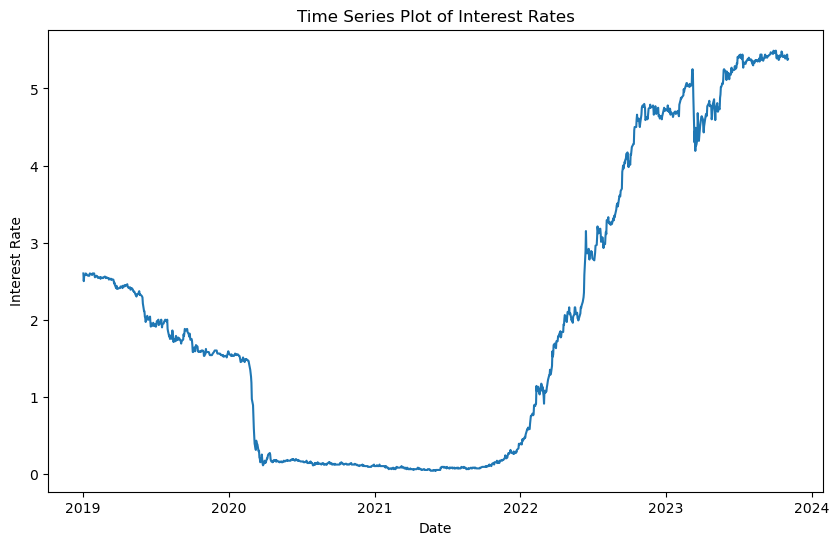

In [76]:
# Time Series Plot of Interest Rates

final_df['Date'] = pd.to_datetime(final_df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['daily_rate'])
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Time Series Plot of Interest Rates')
plt.show()

In [77]:
# Validate the slope of the interest rates plot

In [78]:
# Import few libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert 'Date' column to numeric values
final_df['Date'] = pd.to_numeric(final_df['Date'])

# Create the feature matrix X and target variable y
X = final_df['Date'].values.reshape(-1, 1)  # Reshape to 2D array
y = final_df['daily_rate'].values

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Retrieve the slope of the regression line
slope = regression_model.coef_[0]
# Print the result
slope

2.5275815309569347e-17

In [79]:
# Thus, the Time Series Plot of Interest Rates has a positive slope, indicating an upward trend.

In [80]:
# Repeat the same for stock market indices

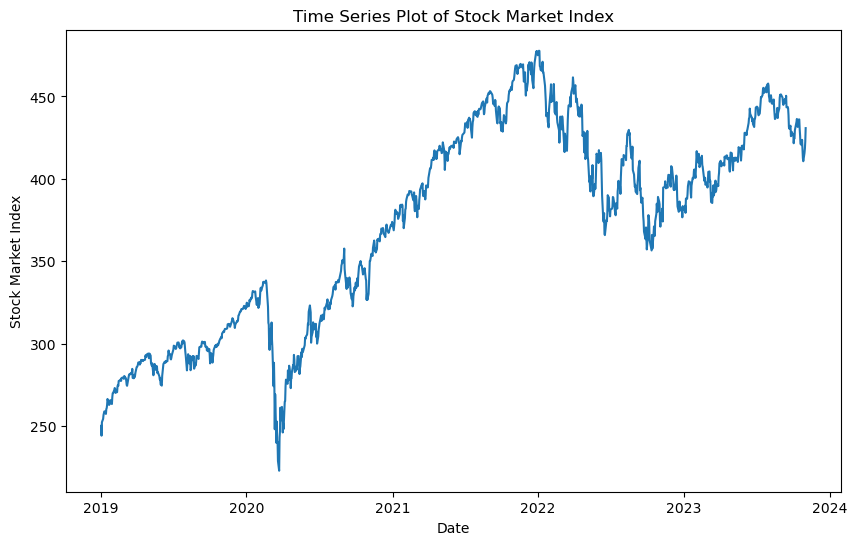

In [81]:
# Time Series Plot of Stock Market Indices

final_df['Date'] = pd.to_datetime(final_df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['spy_closePrice'])
plt.xlabel('Date')
plt.ylabel('Stock Market Index')
plt.title('Time Series Plot of Stock Market Index')
plt.show()

In [82]:
# Validate the slope of the stock market indices plot

In [83]:
# Import few libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert 'Date' column to numeric values
final_df['Date'] = pd.to_numeric(final_df['Date'])

# Create the feature matrix X and target variable y
X = final_df['Date'].values.reshape(-1, 1)  # Reshape to 2D array
y = final_df['spy_closePrice'].values

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Retrieve the slope of the regression line
slope = regression_model.coef_[0]
# Print the result
slope

1.157900419872974e-15

In [84]:
# Thus, the Time Series Plot of Stock Market Index has a positive slope, indicating an upward trend.

In [85]:
# Repeat the same for Intel stock prices.

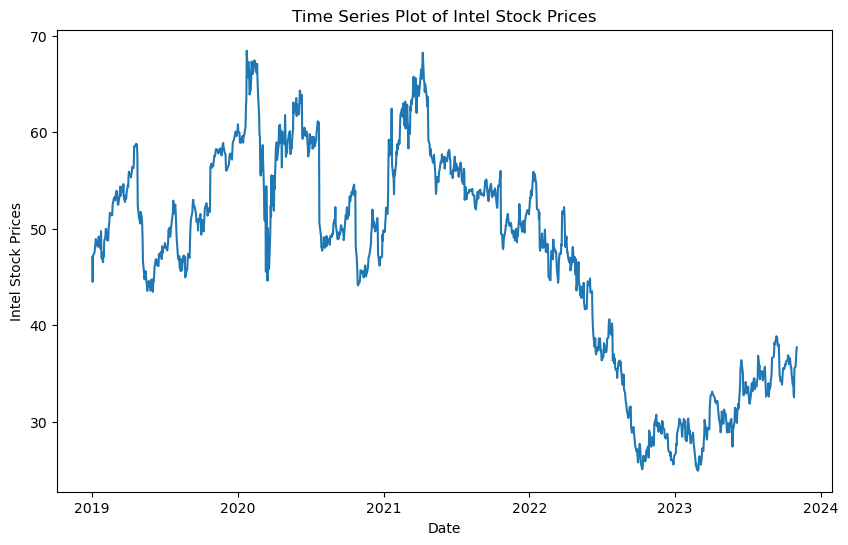

In [86]:
# Time Series Plot of Intel Stock Prices

final_df['Date'] = pd.to_datetime(final_df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['intc_closePrice'])
plt.xlabel('Date')
plt.ylabel('Intel Stock Prices')
plt.title('Time Series Plot of Intel Stock Prices')
plt.show()

In [87]:
# Validate the slope of the Intel stock prices plot

In [88]:
# Import few libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert 'Date' column to numeric values
final_df['Date'] = pd.to_numeric(final_df['Date'])

# Create the feature matrix X and target variable y
X = final_df['Date'].values.reshape(-1, 1)  # Reshape to 2D array
y = final_df['intc_closePrice'].values

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Retrieve the slope of the regression line
slope = regression_model.coef_[0]
# Print the result
slope

-1.7683373359339168e-16

In [89]:
# Thus, the Time Series Plot of Intel Stock Prices has a negative slope, indicating a downward trend.

In [90]:
# Repeat the same for AMD stock prices.

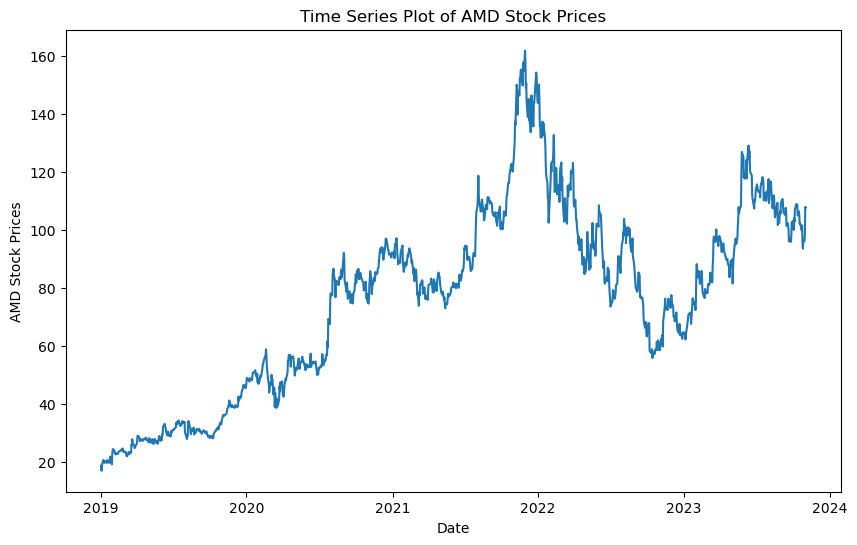

In [91]:
# Time Series Plot of AMD Stock Prices

final_df['Date'] = pd.to_datetime(final_df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['amd_closePrice'])
plt.xlabel('Date')
plt.ylabel('AMD Stock Prices')
plt.title('Time Series Plot of AMD Stock Prices')
plt.show()

In [92]:
# Validate the slope of the AMD stock prices plot

In [93]:
# Import few libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert 'Date' column to numeric values
final_df['Date'] = pd.to_numeric(final_df['Date'])

# Create the feature matrix X and target variable y
X = final_df['Date'].values.reshape(-1, 1)  # Reshape to 2D array
y = final_df['amd_closePrice'].values

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Retrieve the slope of the regression line
slope = regression_model.coef_[0]
# Print the result
slope

5.449392582451995e-16

In [94]:
# Thus, the Time Series Plot of AMD Stock Prices has a positive slope, indicating an upward trend.

In [95]:
# Correlation Heatmap

# Show few rows
final_df.head()

,nvda_closePrice,nvda_point_change,nvda_Indication,spy_closePrice,intc_closePrice,amd_closePrice,Date,Id,daily_rate,1 Mo,...,nvda_HighPrice,nvda_lowPrice,intc_OpenPrice,intc_HighPrice,intc_LowPrice,intc_volumn,amd_OpenPrice,amd_HighPrice,amd_LowPrice,amd_volumn
0,34.055000,2.057501,Up-day,250.179993,47.080002,18.830000,1546387200000000000,1,2.60,2.40,...,34.619999,32.512501,45.959999,47.470001,45.770000,18774600,18.010000,19.000000,17.980000,87148700
1,31.997499,-2.050001,Down-day,244.210007,44.490002,17.049999,1546473600000000000,2,2.50,2.42,...,33.790001,31.922501,46.150002,46.279999,44.389999,32267300,18.420000,18.680000,16.940001,117277600
2,34.047501,-1.802498,Down-day,252.389999,47.220001,19.000000,1546560000000000000,3,2.57,2.40,...,34.432499,32.424999,45.840000,47.570000,45.540001,35447300,17.549999,19.070000,17.430000,111878600
3,35.849998,0.892498,Up-day,254.380005,47.439999,20.570000,1546819200000000000,4,2.58,2.42,...,36.222500,34.107498,47.099998,48.000000,46.750000,22736800,19.440001,20.680000,19.000000,107157000
4,34.957500,-0.687500,Down-day,256.769989,47.740002,20.750000,1546905600000000000,5,2.60,2.40,...,36.695000,34.224998,47.799999,48.029999,46.779999,22749200,21.190001,21.200001,19.680000,121271000


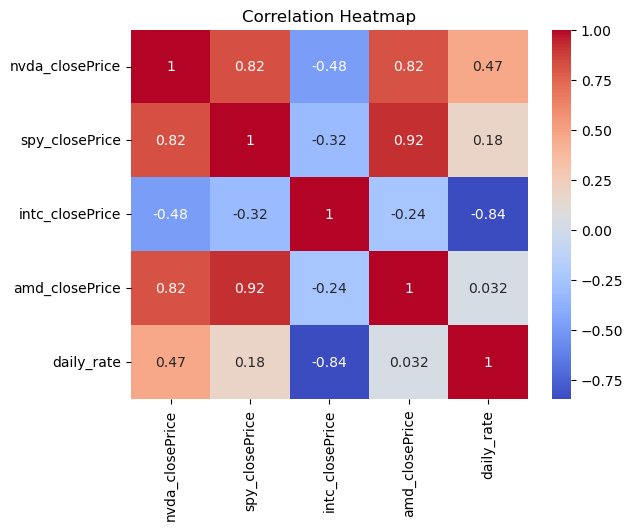

In [96]:
# Calculate the correlation matrix between the columns in the 'final_df'. 
# The corr() function calculates the pairwise correlation coefficients between the selected columns.
correlation_matrix = final_df[['nvda_closePrice', 'spy_closePrice', 'intc_closePrice','amd_closePrice','daily_rate']].corr()

# Create a heatmap using the seaborn library (sns). 
# The heatmap() function is used to plot the correlation matrix as a colored grid, 
# where the colors represent the strength and direction of the correlation. 
# The annot=True parameter displays the correlation coefficients on the heatmap.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Set the title of the heatmap as 'Correlation Heatmap'.
plt.title('Correlation Heatmap')
# Display the plot
plt.show()

In [97]:
# The heatmap helps to identify the relationships and dependencies between these variables. 
# Positive correlations are indicated by red/light red color, while negative correlations are indicated by blue/light blue color. 
# The correlation coefficients displayed on the heatmap provide a numerical measure of the strength and direction of the correlations.

# The correlation between interest rate and NVIDIA stock price is negative, meaning, as the rate increases, the NVDIA stock price decreases.
# The correlation between interest rate and S&P 500 index is positive, meaning, as the rate increases, the S&P 500 index increases.
# The correlation between interest rate and Intel stock price is negative, meaning, as the rate increases, the Intel stock price decreases.
# The correlation between interest rate and AMD stock price is positive, meaning, as the rate increases, the AMD stock pricer increases.


In [98]:
# Create scatter plot:

# NVIDIA Vs. S&P500 index
# NVIDIA Vs. Interest rate
# NVIDIA Vs. Intel 
# NVIDIA Vs. AMD

In [99]:
# Subset the data for the variables of interest rate, S&P 500, NVDIA, Intel, and AMD.
interest_rate = final_df['daily_rate']
stock_market = final_df['spy_closePrice']
nvda = final_df['nvda_closePrice']
intc = final_df['intc_closePrice']
amd = final_df['amd_closePrice']

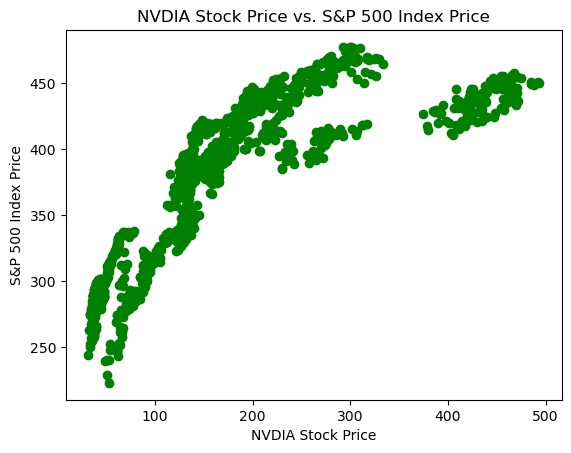

In [100]:
# Import matplotlib library
import matplotlib.pyplot as plt

# NVIDIA Vs. stock market index scatter plot
# NVIDIA represents the x-axis values, and stock_market represents the y-axis values. 
# Each data point is represented as a single point on the plot, where the x-coordinate corresponds to the NVIDIA, and the y-coordinate corresponds to the S&P 500 index price.
plt.scatter(nvda, stock_market, color='g')
# Set the label for the x-axis as "Interest Rate."
plt.xlabel('NVDIA Stock Price')
# Set the label for the y-axis as "S&P 500 Index Price."
plt.ylabel('S&P 500 Index Price')
# Set the title of the scatter plot as "NVIDIA vs. S&P 500 Index Price."
plt.title('NVDIA Stock Price vs. S&P 500 Index Price')
# Display the plot
plt.show()

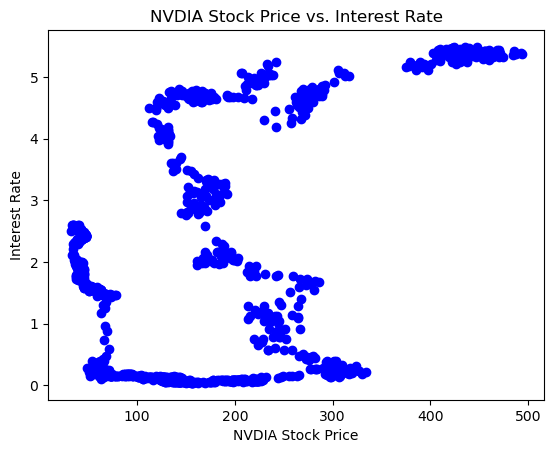

In [101]:
# Import matplotlib library
import matplotlib.pyplot as plt

# NVIDIA Vs. Interest rate scatter plot
# NVIDIA represents the x-axis values, and interest rate the y-axis values. 
# Each data point is represented as a single point on the plot, where the x-coordinate corresponds to the NVIDIA, and the y-coordinate corresponds to the Interest rate.
plt.scatter(nvda, interest_rate, color='b')
# Set the label for the x-axis as "NVIDIA."
plt.xlabel('NVDIA Stock Price')
# Set the label for the y-axis as "Interest rate."
plt.ylabel('Interest Rate')
# Set the title of the scatter plot as "NVDIA vs. Interest rate."
plt.title('NVDIA Stock Price vs. Interest Rate')
# Display the plot
plt.show()

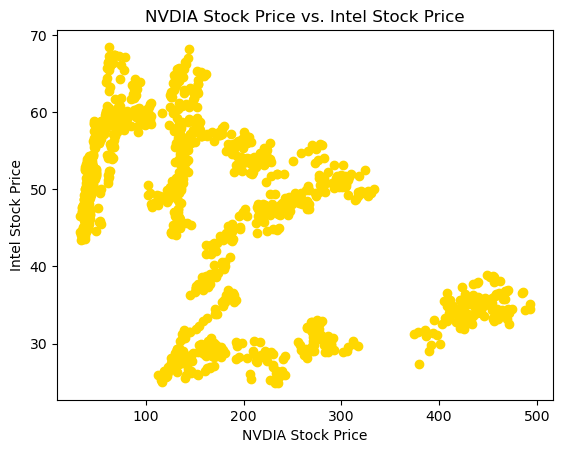

In [102]:
# Import matplotlib library
import matplotlib.pyplot as plt

# NVIDIA Vs. Intel scatter plot
# NVIDIA represents the x-axis values, and stock_market represents the y-axis values. 
# Each data point is represented as a single point on the plot, where the x-coordinate corresponds to the NVIDIA, and the y-coordinate corresponds to the Intel stock price.
plt.scatter(nvda, intc, color='gold')
# Set the label for the x-axis as "Interest Rate."
plt.xlabel('NVDIA Stock Price')
# Set the label for the y-axis as "Intel Stock Price."
plt.ylabel('Intel Stock Price')
# Set the title of the scatter plot as "NVIDIA vs. S&P 500 Index Price."
plt.title('NVDIA Stock Price vs. Intel Stock Price')
# Display the plot
plt.show()

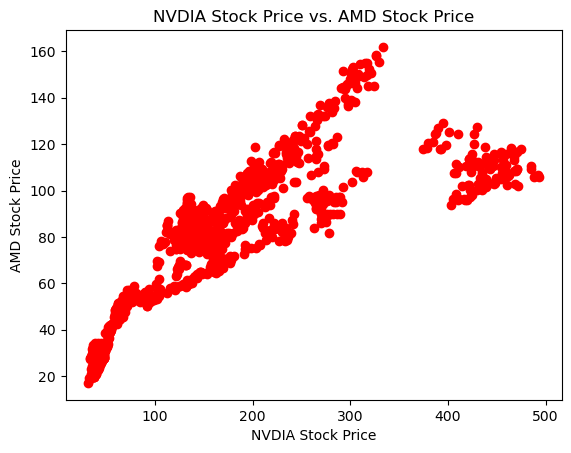

In [103]:
# Import matplotlib library
import matplotlib.pyplot as plt

# NVIDIA Vs. AMD scatter plot
# NVIDIA represents the x-axis values, and AMD represents the y-axis values. 
# Each data point is represented as a single point on the plot, where the x-coordinate corresponds to the NVIDIA, and the y-coordinate corresponds to the AMD stock price.
plt.scatter(nvda, amd, color='r')
# Set the label for the x-axis as "Interest Rate."
plt.xlabel('NVDIA Stock Price')
# Set the label for the y-axis as "AMD Stock Price."
plt.ylabel('AMD Stock Price')
# Set the title of the scatter plot as "NVIDIA vs. AMD Stock Price."
plt.title('NVDIA Stock Price vs. AMD Stock Price')
# Display the plot
plt.show()

In [104]:
# Analyze their relationship

In [105]:
# Import few libraries
import pandas as pd
import numpy as np

# Subset the data for the variables of interest
interest_rate = final_df['daily_rate']
stock_market = final_df['spy_closePrice']
nvda = final_df['nvda_closePrice']
intc = final_df['intc_closePrice']
amd = final_df['amd_closePrice']


# Calculate the covariance and Pearson's correlation coefficients for the two pairs of variables.
# This line calculates the covariance between the interest_rate and stock_market variables using the cov() function from NumPy. 
# The cov() function returns a covariance matrix, and I select the value at index [0][1] to obtain the covariance between the two variables.
nvda_stock_cov = np.cov(nvda, stock_market)[0][1]
# This line calculates the Pearson's correlation coefficient between the NVIDIA and stock_market variables 
# using the corrcoef() function from NumPy. 
# The corrcoef() function returns a correlation matrix, and I select the value at index [0][1] to obtain the correlation coefficient between the two variables.
nvda_stock_corr = np.corrcoef(nvda, stock_market)[0][1]
# This line calculates the covariance between the NVIDIA and Intel variables in the same way as explained above.
nvda_intc_cov = np.cov(nvda, intc)[0][1]

# This line calculates the Pearson's correlation coefficient between the NVIDIA and 
# Intel variables in the same way as explained above.
nvda_intc_corr = np.corrcoef(nvda, intc)[0][1]

# This line calculates the covariance between the NVIDIA and interest_rate variables in the same way as explained above.
nvda_rate_cov = np.cov(nvda, interest_rate)[0][1]
# This line calculates the Pearson's correlation coefficient between the NIVIDIA and 
# interest_rate in the same way as explained above.
nvda_rate_corr = np.corrcoef(nvda, interest_rate)[0][1]

# This line calculates the covariance between the NVIDIA and AMD variables in the same way as explained above.
nvda_amd_cov = np.cov(nvda, amd)[0][1]
# This line calculates the Pearson's correlation coefficient between the NVIDIA and 
# AMD variables in the same way as explained above.
nvda_amd_corr = np.corrcoef(nvda, amd)[0][1]


# Print the covariance and Pearson's correlation coefficients
print(f'NVIDIA and Stock Market Index: Covariance = {nvda_stock_cov:.2f}, Pearson\'s Correlation = {nvda_stock_corr:.2f}')
print(f'NVIDIA and Interest rate: Covariance = {nvda_rate_cov:.2f}, Pearson\'s Correlation = {nvda_rate_corr:.2f}')
print(f'NVIDIA and Intel: Covariance = {nvda_intc_cov:.2f}, Pearson\'s Correlation = {nvda_intc_corr:.2f}')
print(f'NVIDIA and AMD: Covariance = {nvda_amd_cov:.2f}, Pearson\'s Correlation = {nvda_amd_corr:.2f}')

NVIDIA and Stock Market Index: Covariance = 5844.59, Pearson's Correlation = 0.82
NVIDIA and Interest rate: Covariance = 101.30, Pearson's Correlation = 0.47
NVIDIA and Intel: Covariance = -601.70, Pearson's Correlation = -0.48
NVIDIA and AMD: Covariance = 3003.70, Pearson's Correlation = 0.82


In [106]:
# Covariance measures the linear relationship between two variables and provides information about 
# the direction and magnitude of their association. A positive covariance indicates a positive relationship, 
# while a negative covariance indicates a negative relationship.

# Pearson's correlation coefficient is a standardized measure of the linear relationship between two variables. 
# It ranges from -1 to +1, with values closer to +1 indicating a strong positive correlation, 
# values closer to -1 indicating a strong negative correlation, 
# and values close to 0 indicating little or no linear correlation.

# Analyzing the scatter plots, I can gain insights into the correlation and potential causation between the two variables. 

# In the first scatter plot, I can see that there is a strong positive correlation between NVIDIA and the stock market index. 
# As stock market index increases, the NVIDIA tends to increase. 
# However, it's important to note that correlation does not necessarily imply causation, 
# and there may be other factors at play that are influencing the relationship between the two variables.

# In the second scatter plot, I can see that there is a negative correlation between NVIDIA and the interest rate. 
# As interest rate increases, the NVIDIA tends to decreases. 
# This correlation could be indicative of a causal relationship between the two variables, 
# as changes in interest rate may be influencing changes in the NVIDIA. 

# In the third scatter plot, I can see that there is a negative correlation between NVIDIA and the Intel. 
# As Intel increases, the NVIDIA tends to decreases. 

# In the fourth scatter plot, I can see that there is a strong positive correlation between NVIDIA and AMD. 
# As AMD increases, the NVIDIA tends to increase. 

In [107]:
# Show few rows
final_df.head()

,nvda_closePrice,nvda_point_change,nvda_Indication,spy_closePrice,intc_closePrice,amd_closePrice,Date,Id,daily_rate,1 Mo,...,nvda_HighPrice,nvda_lowPrice,intc_OpenPrice,intc_HighPrice,intc_LowPrice,intc_volumn,amd_OpenPrice,amd_HighPrice,amd_LowPrice,amd_volumn
0,34.055000,2.057501,Up-day,250.179993,47.080002,18.830000,1546387200000000000,1,2.60,2.40,...,34.619999,32.512501,45.959999,47.470001,45.770000,18774600,18.010000,19.000000,17.980000,87148700
1,31.997499,-2.050001,Down-day,244.210007,44.490002,17.049999,1546473600000000000,2,2.50,2.42,...,33.790001,31.922501,46.150002,46.279999,44.389999,32267300,18.420000,18.680000,16.940001,117277600
2,34.047501,-1.802498,Down-day,252.389999,47.220001,19.000000,1546560000000000000,3,2.57,2.40,...,34.432499,32.424999,45.840000,47.570000,45.540001,35447300,17.549999,19.070000,17.430000,111878600
3,35.849998,0.892498,Up-day,254.380005,47.439999,20.570000,1546819200000000000,4,2.58,2.42,...,36.222500,34.107498,47.099998,48.000000,46.750000,22736800,19.440001,20.680000,19.000000,107157000
4,34.957500,-0.687500,Down-day,256.769989,47.740002,20.750000,1546905600000000000,5,2.60,2.40,...,36.695000,34.224998,47.799999,48.029999,46.779999,22749200,21.190001,21.200001,19.680000,121271000


# Drop any features that are not useful.

In [108]:
# List the column names
final_df.columns

Index(['nvda_closePrice', 'nvda_point_change', 'nvda_Indication',
       'spy_closePrice', 'intc_closePrice', 'amd_closePrice', 'Date', 'Id',
       'daily_rate', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr', 'spy_OpenPrice', 'spy_HighPrice',
       'spy_LowPrice', 'spy_volumn', 'nvda_volumn', 'nvda_OpenPrice',
       'nvda_HighPrice', 'nvda_lowPrice', 'intc_OpenPrice', 'intc_HighPrice',
       'intc_LowPrice', 'intc_volumn', 'amd_OpenPrice', 'amd_HighPrice',
       'amd_LowPrice', 'amd_volumn'],
      dtype='object')

In [109]:
# I would drop the following features:

# 1.Date: Since I have already used the 'Date' feature to plot the time series. I may not need it for model building.

# 2.Id: It does not provide any meaningful information related to the target variable or the other features.

# 3.'spy_OpenPrice', 'spy_HighPrice', 'spy_LowPrice', 'spy_volumn', 'nvda_volumn', 'nvda_OpenPrice', 
# 'nvda_HighPrice', 'nvda_lowPrice', 'intc_OpenPrice', 'intc_HighPrice','intc_LowPrice', 'intc_volumn', 
# 'amd_OpenPrice', 'amd_HighPrice', 'amd_LowPrice', 'amd_volumn': These features might have some impact on stock prices, 
# but they are unlikely to be major drivers. 

# 4.'1 Mo', '2 Mo', '3 Mo', '6 Mo', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr': 
# While interest rates can influence stock prices, including all these features can lead to a high-dimensional dataset, 
# making the model more complex without necessarily adding substantial predictive power.

# Drop the unnecessary features
final_df.drop(['Date', 'Id', 'spy_OpenPrice', 'spy_HighPrice',
       'spy_LowPrice', 'spy_volumn', 'nvda_volumn', 'nvda_OpenPrice',
       'nvda_HighPrice', 'nvda_lowPrice', 'intc_OpenPrice', 'intc_HighPrice',
       'intc_LowPrice', 'intc_volumn', 'amd_OpenPrice', 'amd_HighPrice',
       'amd_LowPrice', 'amd_volumn',
         '1 Mo', '2 Mo', '3 Mo', '6 Mo', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
         axis=1, inplace=True)

In [110]:
# Show few rows
final_df.head()

,nvda_closePrice,nvda_point_change,nvda_Indication,spy_closePrice,intc_closePrice,amd_closePrice,daily_rate
0,34.055000,2.057501,Up-day,250.179993,47.080002,18.830000,2.60
1,31.997499,-2.050001,Down-day,244.210007,44.490002,17.049999,2.50
2,34.047501,-1.802498,Down-day,252.389999,47.220001,19.000000,2.57
3,35.849998,0.892498,Up-day,254.380005,47.439999,20.570000,2.58
4,34.957500,-0.687500,Down-day,256.769989,47.740002,20.750000,2.60


# Convert categorial column to numeric column

In [111]:
# Display the unique values in the nvda_Indication column
final_df['nvda_Indication'].unique()

array(['Up-day', 'Down-day'], dtype=object)

In [112]:
# final_df['nvda_Indication']: This selects the column named 'nvda_Indication' from the DataFrame final_df.
# .map({'Up-day': 0, 'Down-day': 1}): The map() method is applied to the selected column. 
# It takes a dictionary as an argument, where keys are the original categorical values, 
# and values are the corresponding numerical values that I want to replace with. 
# In this case, it converts 'Up-day' to 0 and 'Down-day' to 1.
final_df['nvda_Indication'] = final_df['nvda_Indication'].map({'Up-day':0,'Down-day':1})

In [113]:
# Show few rows
final_df.head()

,nvda_closePrice,nvda_point_change,nvda_Indication,spy_closePrice,intc_closePrice,amd_closePrice,daily_rate
0,34.055000,2.057501,0,250.179993,47.080002,18.830000,2.60
1,31.997499,-2.050001,1,244.210007,44.490002,17.049999,2.50
2,34.047501,-1.802498,1,252.389999,47.220001,19.000000,2.57
3,35.849998,0.892498,0,254.380005,47.439999,20.570000,2.58
4,34.957500,-0.687500,1,256.769989,47.740002,20.750000,2.60


# Store feature Matrix in X and Response (target) in vector y

In [114]:
# List the column names
final_df.columns

Index(['nvda_closePrice', 'nvda_point_change', 'nvda_Indication',
       'spy_closePrice', 'intc_closePrice', 'amd_closePrice', 'daily_rate'],
      dtype='object')

In [115]:
# The drop() method in Pandas is used to remove columns from a DataFrame. 
# In this case, it drops the column named 'nvda_closePrice' from the DataFrame final_df. 
# The parameter axis=1 indicates that I want to drop a column 
# Assign the resulting DataFrame after dropping the column 'nvda_closePrice' to the variable X. 
# X now contains all the features (independent variables) for the machine learning model.
X=final_df.drop(['nvda_closePrice'], axis=1)

# Display the independent features
X

,nvda_point_change,nvda_Indication,spy_closePrice,intc_closePrice,amd_closePrice,daily_rate
0,2.057501,0,250.179993,47.080002,18.830000,2.60
1,-2.050001,1,244.210007,44.490002,17.049999,2.50
2,-1.802498,1,252.389999,47.220001,19.000000,2.57
3,0.892498,0,254.380005,47.439999,20.570000,2.58
4,-0.687500,1,256.769989,47.740002,20.750000,2.60
...,...,...,...,...,...,...
1204,-6.609985,1,410.679993,35.540001,96.430000,5.39
1205,3.809998,0,415.589996,35.689999,96.180000,5.41
1206,-15.450012,1,418.200012,36.500000,98.500000,5.44
1207,-11.809998,1,422.660004,37.290001,108.040001,5.37


In [116]:
# Select the target variable (or dependent variable) 'nvda_closePrice' from the DataFrame final_df.
y = final_df['nvda_closePrice']

# Display the dependent target
y

0        34.055000
1        31.997499
2        34.047501
3        35.849998
4        34.957500
           ...    
1204    405.000000
1205    411.609985
1206    407.799988
1207    423.250000
1208    435.059998
Name: nvda_closePrice, Length: 1209, dtype: float64

# Feature scaling (Normalization)

In [117]:
# Import MinMaxScaler for scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class, which will be used to perform feature scaling.
sc = MinMaxScaler()
# scaler.fit_transform(...): The fit_transform method of the MinMaxScaler class is used to perform feature scaling 
# on the independent features. 
# The fit_transform method first fits the scaler to the data to compute the minimum and maximum values for each feature, 
# and then it transforms the data using the computed minimum and maximum values to scale the data.
X_scaled = sc.fit_transform(X)
# Show feature scaling
X_scaled

array([[0.78688657, 0.        , 0.1068849 , 0.5090659 , 0.01228773,
        0.46972477],
       [0.74462396, 1.        , 0.08345113, 0.44962133, 0.        ,
        0.45137615],
       [0.74717055, 1.        , 0.11555975, 0.51227911, 0.01346128,
        0.46422018],
       ...,
       [0.60674954, 1.        , 0.76640768, 0.26623824, 0.562267  ,
        0.99082569],
       [0.64420211, 1.        , 0.78391432, 0.28437   , 0.6281237 ,
        0.97798165],
       [0.61148276, 1.        , 0.81570897, 0.29378014, 0.62667403,
        0.97981651]])

In [118]:
import numpy as np

# Repeat the same for the dependent feature
sc1 = MinMaxScaler()
y_reshape = y.values.reshape(-1,1)
y_scaled = sc1.fit_transform(y_reshape)
y_scaled = np.ravel(y_scaled)
y_scaled

array([0.00445778, 0.        , 0.00444153, ..., 0.81421398, 0.84768799,
       0.87327554])

# Splitting the dataset into the training and testing set

In [119]:
# Import the train_test_split function from the scikit-learn library. 
# The train_test_split function is used to split datasets into training and testing subsets.
from sklearn.model_selection import train_test_split

# Call the train_test_split function and performs the dataset split.
# X: This is the feature matrix containing all the independent variables.
# y: This is the target variable, which contains the dependent variable to be predicted.
# test_size=0.2: 20% of the data will be used for testing, and 80% will be used for training.
# random_state=42: This parameter sets the random seed for reproducibility
# X_train: This is the feature matrix for training, containing 80% of the data.
# X_test: This is the feature matrix for testing, containing 20% of the data.
# y_train: This is the target variable for training, corresponding to the 80% of the data used for training.
# y_test: This is the target variable for testing, corresponding to the 20% of the data used for testing.
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=42)

# Import models

In [120]:
# Import the LinearRegression class from the scikit-learn library. 
# LinearRegression is a simple and commonly used linear regression model. 
# It fits a linear equation to the input features to predict the target variable.
from sklearn.linear_model import LinearRegression

# Import the SVR class from the scikit-learn library. 
# SVR stands for Support Vector Regressor. 
# It is a regression model based on Support Vector Machines (SVM) that can handle non-linear relationships by using kernels to transform the data into higher dimensions.
from sklearn.svm import SVR

# Import the RandomForestRegressor class from the scikit-learn library. 
# RandomForestRegressor is an ensemble model based on decision trees. 
from sklearn.ensemble import RandomForestRegressor

# Import the GradientBoostingRegressor class from the scikit-learn library. 
# GradientBoostingRegressor is another ensemble model that combines multiple weak learners (usually decision trees) in a sequential manner to build a strong predictive model.
from sklearn.ensemble import GradientBoostingRegressor

# Model training

In [121]:
# Create an instance of the LinearRegression class and assigns it to the variable lr.
lr = LinearRegression()
# Fit the LinearRegression model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the linear regression model using the provided data.
lr.fit(X_train,y_train)

# Create an instance of the SVR class and assigns it to the variable svm.
# The SVR class represents a Support Vector Regressor, which is a type of Support Vector Machine (SVM) used for regression tasks.
svm = SVR()
# Fit the SVR model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the Support Vector Regressor model using the provided data.
svm.fit(X_train,y_train)

# Create an instance of the RandomForestRegressor class and assigns it to the variable rf
rf = RandomForestRegressor()
# fFt the RandomForestRegressor model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the Random Forest Regressor model using the provided data.
rf.fit(X_train, y_train)

# Create an instance of the GradientBoostingRegressor class and assigns it to the variable gbr.
gbr = GradientBoostingRegressor()
# Fit the GradientBoostingRegressor model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the Gradient Boosting Regressor model using the provided data.
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

# Prediction on testing data

In [122]:
# Use the trained linear regression model (lr) to make predictions on the test data X_test. 
# The predict() method of the LinearRegression class takes the test data as input and 
# returns the predicted target variable values (y_pred1) based on the learned linear relationship between the features and the target variable.
y_pred1 = lr.predict(X_test)

# Use the trained Support Vector Regressor model (svm) to make predictions on the test data X_test. 
# The predict() method of the SVR class takes the test data as input and returns the predicted target variable values 
# (y_pred2) based on the learned relationship using Support Vector Regression.
y_pred2 = svm.predict(X_test)

# Use the trained Random Forest Regressor model (rf) to make predictions on the test data X_test. 
# The predict() method of the RandomForestRegressor class takes the test data as input and returns 
# the predicted target variable values (y_pred3) based on the ensemble of decision trees learned during training.
y_pred3 = rf.predict(X_test)

# Use the trained Gradient Boosting Regressor model (gbr) to make predictions on the test data X_test. 
# The predict() method of the GradientBoostingRegressor class takes the test data as input and returns 
# the predicted target variable values (y_pred4) based on the ensemble of weak learners learned in a sequential manner during training.
y_pred4 = gbr.predict(X_test)

In [123]:
# Create a new Pandas DataFrame named df that contains the actual target values (y_test) and 
# the predicted values from four different regression models 
# (Linear Regression, Support Vector Regressor, Random Forest Regressor, and Gradient Boosting Regressor)
df = pd.DataFrame({'Actual':y_test,
                  'LR':y_pred1,
                  'SVM':y_pred2,
                  'RF':y_pred3,
                  'GBR': y_pred4})

In [124]:
# Show few rows
df.head()

,Actual,LR,SVM,RF,GBR
0,0.006689,-0.027830,0.058833,0.006676,0.011942
1,0.193347,0.124935,0.169863,0.172414,0.191515
2,0.074531,-0.001095,0.141642,0.070485,0.074814
3,0.011071,0.006754,0.040117,0.011791,0.018601
4,0.239740,0.310626,0.247071,0.236511,0.241482


# Compare Performance Visually

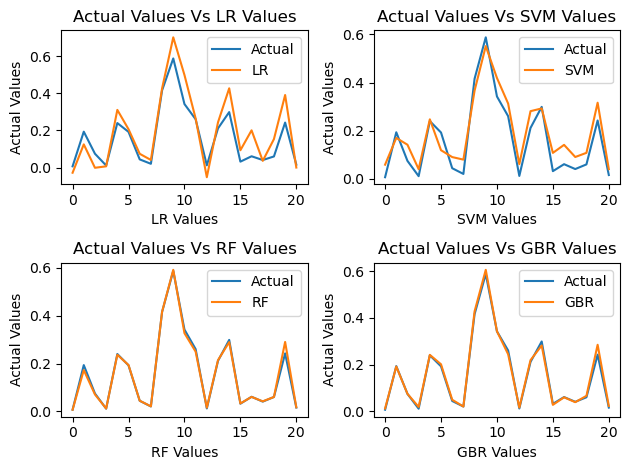

In [125]:
# Import matplotlib library
import matplotlib.pyplot as plt

# creates a 2x2 grid of subplots and selects the first subplot (top-left position, numbered 221). 
# It then plots the first 20 data points of the 'Actual' and 'LR' columns from the DataFrame df. 
# The label parameter is used to provide a label for each line in the plot. 
# The legend() function is called to display a legend for the plotted lines.
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:21],label = 'Actual')
plt.plot(df['LR'].iloc[0:21], label = 'LR')
plt.xlabel('LR Values')
plt.ylabel('Actual Values')
plt.title('Actual Values Vs LR Values')
plt.legend()

# Repeat the same for SVM
plt.subplot(222)
plt.plot(df['Actual'].iloc[0:21],label = 'Actual')
plt.plot(df['SVM'].iloc[0:21], label = 'SVM')
plt.xlabel('SVM Values')
plt.ylabel('Actual Values')
plt.title('Actual Values Vs SVM Values')
plt.legend()

# Repeat the same for RF
plt.subplot(223)
plt.plot(df['Actual'].iloc[0:21],label = 'Actual')
plt.plot(df['RF'].iloc[0:21], label = 'RF')
plt.xlabel('RF Values')
plt.ylabel('Actual Values')
plt.title('Actual Values Vs RF Values')
plt.legend()

# Repeat the same for GBR
plt.subplot(224)
plt.plot(df['Actual'].iloc[0:21],label = 'Actual')
plt.plot(df['GBR'].iloc[0:21], label = 'GBR')
plt.xlabel('GBR Values')
plt.ylabel('Actual Values')
plt.title('Actual Values Vs GBR Values')

plt.tight_layout()
plt.legend()

In [126]:
# The RF model and GBR model are better than LR model and SVM model visually. 

# Evaluate the algorithm

In [127]:
# Evaluating the algorithm

# Import the metrics module from scikit-learn. 
from sklearn import metrics

# Calculate the R-squared (R2) score for the first regression(LR) model's predictions (y_pred1) compared to the actual target values (y_test). 
# The r2_score() function from the metrics module takes two arguments: the actual target values (y_test) and the predicted target values from the model (y_pred1). 
# It then returns the R2 score, which is a value between -1 and 1. 
# R2 score of 1 indicates that the model perfectly fits the data, 
# 0 indicates that the model's predictions are no better than guessing the mean of the target values, 
# and negative values indicate that the model's predictions are worse than guessing the mean.
score_lr = metrics.r2_score(y_test,y_pred1)

# Repeat the same for the second regression(SVM)
score_svm = metrics.r2_score(y_test,y_pred2)

# Repeat the same for the third regression(RF)
score_rf = metrics.r2_score(y_test,y_pred3)

# Repeat the same for the forth regression(GBR)
score_gbr = metrics.r2_score(y_test,y_pred4)

In [128]:
# Print each R2 score.
# The R2 score can be used to assess how well each model has performed in predicting the target variable (y_test). 
# A higher R2 score indicates a better-performing model, 
# while a lower R2 score suggests that the model's predictions are not capturing the variation in the data well.
print(score_lr, score_svm, score_rf, score_gbr)

0.8989701118781389 0.956830980239695 0.9932683796074242 0.991766968868309


In [129]:
import pandas as pd
score=pd.DataFrame({'Model':['LR','SVM','RF','GB'],
             'R2_score':[score_lr,score_svm,score_rf,score_gbr]})

score

,Model,R2_score
0,LR,0.898970
1,SVM,0.956831
2,RF,0.993268
3,GB,0.991767


In [130]:
# RF is the best performing model which has the highest R2 score, 99.33%.

In [131]:
# Using mean absolute error

# Calculate the Mean Absolute Error (MAE) for the first regression(LR) model's predictions (y_pred1) compared to the actual target values (y_test). 
# The mean_absolute_error() function from the metrics module takes two arguments: the actual target values (y_test) and the predicted target values from the model (y_pred1). 
# It then returns the MAE, which is the average absolute difference between the actual target values and the predicted target values. 
# MAE measures the average magnitude of errors, regardless of their direction.
s_lr = metrics.mean_absolute_error(y_test, y_pred1)

# Repeat the same for the second regression(SVM)
s_svm = metrics.mean_absolute_error(y_test, y_pred2)

# Repeat the same for the third regression(RF)
s_rf = metrics.mean_absolute_error(y_test, y_pred3)

# Repeat the same for the forth regression(GBR)
s_gbr = metrics.mean_absolute_error(y_test, y_pred4)

In [132]:
# Print the result
# The MAE can be used to assess how well each model has performed in predicting the target variable (y_test). 
# A lower MAE indicates a better-performing model with smaller errors between predicted and actual values. 
print(s_lr,s_svm,s_rf,s_gbr)

0.06046534658135607 0.04233855635507424 0.010852763429710553 0.014674716469057826


In [133]:
score=pd.DataFrame({'Model':['LR','SVM','RF','GB'],
             'MAE':[s_lr,s_svm,s_rf,s_gbr]})
score

,Model,MAE
0,LR,0.060465
1,SVM,0.042339
2,RF,0.010853
3,GB,0.014675


In [134]:
# Thus, the RF model is the best model.

# Save model using joblib

In [135]:
# Since RF is the best model, I create an instance of the RandomForestRegressor class and assigns it to the variable rf.
rf = RandomForestRegressor()
# Fit (trains) the RandomForestRegressor model to the entire dataset X and the corresponding target variable y. 
rf.fit(X, y)

RandomForestRegressor()

In [136]:
# Import the joblib library
import joblib

# Save the trained RandomForestRegressor model (rf) to a file named 'Model_in_Production'. 
# The dump() function from the joblib library is used to serialize the Python object (rf - the trained model) to the file.
joblib.dump(rf,'Model_in_Production')

['Model_in_Production']

In [137]:
# load the machine learning model stored in the file 'Model_in_Production' into memory and assigns it to the variable model.
model = joblib.load('Model_in_Production')

In [138]:
# I can now use this loaded model to make predictions on new data without the need to retrain the model.